In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


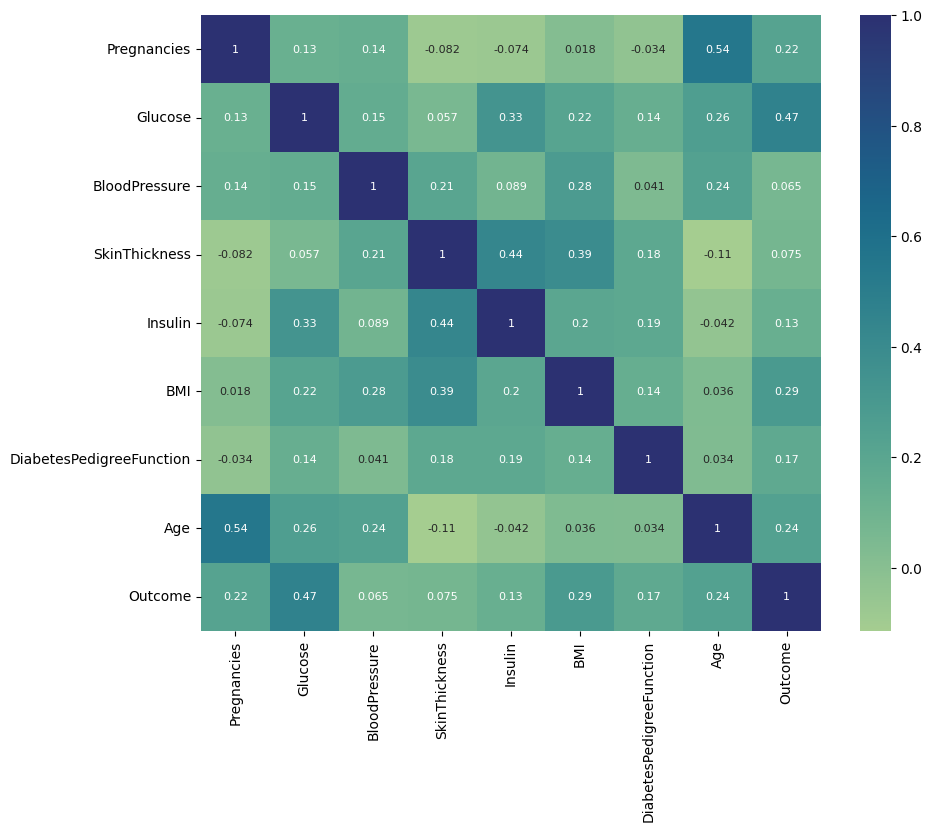

In [6]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="crest", annot_kws={"size": 8})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [7]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train.shape, x_test.shape

((614, 8), (154, 8))

In [10]:
counter = Counter(y_train)
print('Before', counter)
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)
counter = Counter(y_train)
print('After', counter)

Before Counter({0: 401, 1: 213})
After Counter({0: 401, 1: 401})


In [11]:
log_reg = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=1.0, max_iter=200))
log_reg.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=200))])

In [12]:
y_pred = log_reg.predict(x_test)
log_reg.score(x_train,y_train),log_reg.score(x_test,y_test)

(0.7556109725685786, 0.6818181818181818)

In [13]:
accs = accuracy_score(y_pred, y_test)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print('.:. Logistic Regression :'+'\033[1m {:.3f}%'.format(accs*100)+' .:.')

Confusion Matrix:
 [[66 33]
 [16 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73        99
           1       0.54      0.71      0.61        55

    accuracy                           0.68       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.71      0.68      0.69       154

.:. Logistic Regression : 68.182% .:.


In [14]:
# Save with the current version
import joblib
joblib.dump(log_reg, "log_reg.pkl")

['log_reg.pkl']